In [4]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [5]:
class simulator:
    
    def __init__(self):
        self.tMax, self.n = 10, 1000
        self.par = {
            'c': .2, # (uM)
            'rt': .14, # (uM)
            'az': 100, # (/h)
            'bz': 5, # (/h)
            'gz': 100, # (/h)
            'dz': .4, # (/h)
            'kz': 15, # (mM)
            'ag': 100, # (/h)
            'bg': 5, # (/h)
            'gg': 100, # (/h)
            'dg': .4, # (/h)
            'kg': 15, # (mM)
            }
        self.mz0, self.pz0, self.mg0, self.pg0 = 0, 0, 0, 0
    
    def IFFL_circuit(self, t, x):
        par = self.par
        mz, pz, mg, pg = x        
        dmz = par['c'] * par['az'] - par['bz'] * mz
        dpz = par['gz'] * (mz / par['kz']) / (1 + mz / par['kz'] + mg / par['kg']) * par['rt'] - par['dz'] * pz
        dmg = par['c'] * par['ag'] - par['bg'] * mg
        dpg = par['gg'] * (mg / par['kg']) / (1 + mz / par['kz'] + mg / par['kg']) * par['rt'] - par['dg'] * pg
        return dmz, dpz, dmg, dpg
    
    def simulateModel(self):
        t = np.arange(0.0, self.tMax, 0.01)
        x0 = (self.mz0, self.pz0, self.mg0, self.pg0)
        tspan = (0, self.tMax)
        par = self.par
        soln = solve_ivp(self.IFFL_circuit, tspan, x0, t_eval = t, dense_output = True)
        plt.plot(soln.t, soln.y[1, :])
        plt.show()
        pdf.savefig()
        return soln

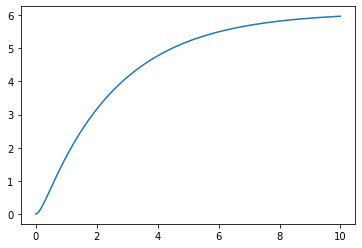

NameError: name 'pdf' is not defined

In [6]:
s = simulator()
a = s.simulateModel()